<a href="https://colab.research.google.com/github/amayasarasacolina/deeplearning/blob/main/Ejercicio%20Regularizadores%20Resuelto%20Amaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [4]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
validation_images=train_images[50000:]
train_images=train_images[:49999]
validation_labels=train_labels[50000:]
train_labels=train_labels[:49999]
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)

In [45]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado
  model = models.Sequential()
  if regularizador==0:
      model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
  elif regularizador==1:
      model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001),activation='relu',input_shape=(28*28,)))
  elif regularizador==2:
      model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),activation='relu',input_shape=(28*28,)))
  elif regularizador==3:
      model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu',input_shape=(28*28,)))
  elif regularizador==4:
      model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
      model.add(layers.Dropout(0.5))
  else:
      print("ERROR. El valor debe estar entre 0 y 4.")
      return 0
  model.add(layers.Dense(10,activation='softmax'))
  model.summary()
  return model

In [6]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  modelo.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return modelo

In [7]:
def entrena_modelo(modelo):
  history = modelo.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_data=(validation_images, validation_labels))
  return history
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history

In [8]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [9]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [10]:
network0 = crea_modelo(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
network0 = compila_modelo(network0)

In [12]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 4s 4ms/step - loss: 0.2821 - accuracy: 0.9174 - val_loss: 0.1425 - val_accuracy: 0.9595
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1163 - accuracy: 0.9662 - val_loss: 0.1007 - val_accuracy: 0.9713
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0772 - accuracy: 0.9774 - val_loss: 0.0849 - val_accuracy: 0.9743
Epoch 4/30
391/391 [==============================] - 2s 5ms/step - loss: 0.0551 - accuracy: 0.9833 - val_loss: 0.0747 - val_accuracy: 0.9789
Epoch 5/30
391/391 [==============================] - 2s 5ms/step - loss: 0.0408 - accuracy: 0.9876 - val_loss: 0.0830 - val_accuracy: 0.9769
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0305 - accuracy: 0.9909 - val_loss: 0.0714 - val_accuracy: 0.9796
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9933 - val_loss: 0.0820 - val_accuracy: 0.9763
Epoch 

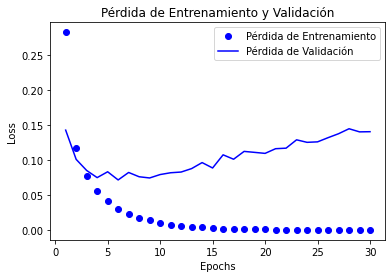

In [13]:
pinta_perdida_entrenamiento_validacion(historia0)

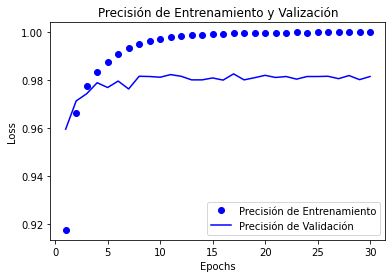

In [14]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [15]:
network1 = crea_modelo(1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
network1 = compila_modelo(network1)

In [17]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 2s 5ms/step - loss: 2.1364 - accuracy: 0.8447 - val_loss: 1.0072 - val_accuracy: 0.8886
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.9680 - accuracy: 0.8789 - val_loss: 0.8553 - val_accuracy: 0.9086
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.8430 - accuracy: 0.9014 - val_loss: 0.8058 - val_accuracy: 0.9060
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7649 - accuracy: 0.9145 - val_loss: 0.7131 - val_accuracy: 0.9292
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7085 - accuracy: 0.9261 - val_loss: 0.7407 - val_accuracy: 0.9146
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.6699 - accuracy: 0.9322 - val_loss: 0.6298 - val_accuracy: 0.9441
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6385 - accuracy: 0.9374 - val_loss: 0.5969 - val_accuracy: 0.9479
Epoch 

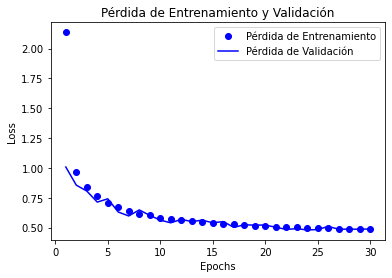

In [19]:
pinta_perdida_entrenamiento_validacion(historia1)

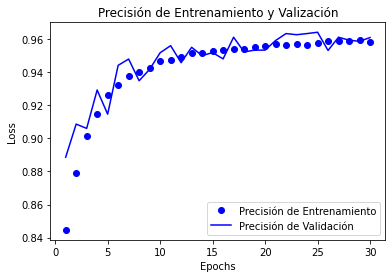

In [20]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [32]:
network2 = crea_modelo(2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [33]:
network2 = compila_modelo(network2)

In [34]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5204 - accuracy: 0.9142 - val_loss: 0.3023 - val_accuracy: 0.9538
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.2620 - accuracy: 0.9545 - val_loss: 0.2913 - val_accuracy: 0.9351
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.2107 - accuracy: 0.9625 - val_loss: 0.1911 - val_accuracy: 0.9695
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1878 - accuracy: 0.9662 - val_loss: 0.1898 - val_accuracy: 0.9655
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1724 - accuracy: 0.9696 - val_loss: 0.1734 - val_accuracy: 0.9687
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1624 - accuracy: 0.9716 - val_loss: 0.1621 - val_accuracy: 0.9723
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1559 - accuracy: 0.9733 - val_loss: 0.1509 - val_accuracy: 0.9742
Epoch 

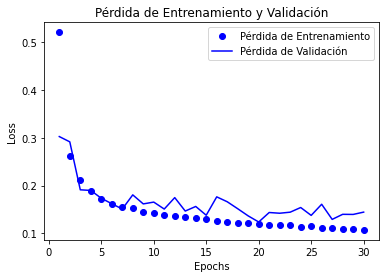

In [35]:
pinta_perdida_entrenamiento_validacion(historia2)

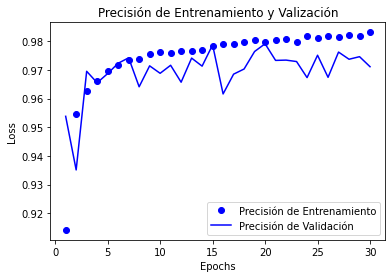

In [36]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [37]:
network3 = crea_modelo(3)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               401920    
                                                                 
 dense_12 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [38]:
network3 = compila_modelo(network3)

In [39]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1667 - accuracy: 0.8419 - val_loss: 1.1848 - val_accuracy: 0.8398
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.9815 - accuracy: 0.8762 - val_loss: 0.8951 - val_accuracy: 0.9029
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.8582 - accuracy: 0.8990 - val_loss: 0.7585 - val_accuracy: 0.9311
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7816 - accuracy: 0.9124 - val_loss: 0.7376 - val_accuracy: 0.9266
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7275 - accuracy: 0.9220 - val_loss: 0.6965 - val_accuracy: 0.9333
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.6905 - accuracy: 0.9293 - val_loss: 0.6713 - val_accuracy: 0.9323
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6610 - accuracy: 0.9343 - val_loss: 0.6289 - val_accuracy: 0.9446
Epoch 

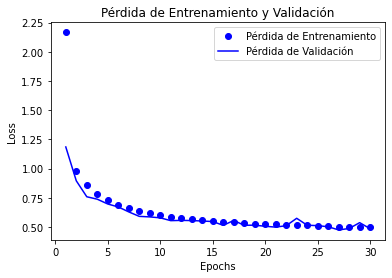

In [40]:
pinta_perdida_entrenamiento_validacion(historia3)

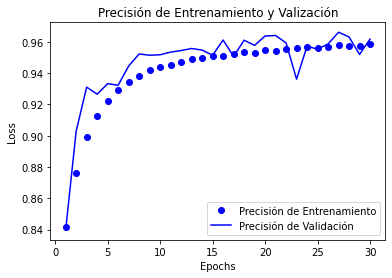

In [41]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [46]:
network4 = crea_modelo(4)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [47]:
network4 = compila_modelo(network4)

In [48]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3420 - accuracy: 0.8991 - val_loss: 0.1590 - val_accuracy: 0.9567
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1685 - accuracy: 0.9494 - val_loss: 0.1088 - val_accuracy: 0.9683
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1272 - accuracy: 0.9615 - val_loss: 0.0934 - val_accuracy: 0.9739
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1059 - accuracy: 0.9683 - val_loss: 0.0915 - val_accuracy: 0.9734
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0922 - accuracy: 0.9729 - val_loss: 0.0803 - val_accuracy: 0.9770
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0796 - accuracy: 0.9762 - val_loss: 0.0787 - val_accuracy: 0.9783
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0753 - accuracy: 0.9777 - val_loss: 0.0785 - val_accuracy: 0.9781
Epoch 

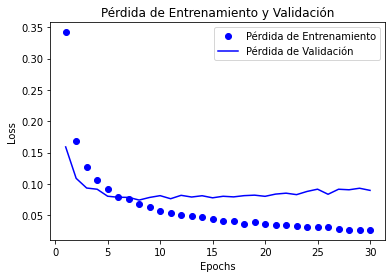

In [49]:
pinta_perdida_entrenamiento_validacion(historia4)

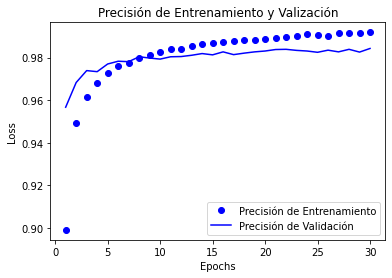

In [50]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [51]:
network5 = crea_modelo(5)

ERROR. El valor debe estar entre 0 y 4.


### CONCLUSIONES

caso 0: pérdida: 0.1402 - precisión: 0.9815

caso 1: pérdida: 0.4882 - precisión: 0.9609

caso 2: pérdida: 0.1445 - precisión: 0.9711

caso 3: pérdida: 0.4846 - precisión: 0.9618

caso 4: pérdida: 0.0897 - precisión: 0.9843


En este caso, las redes 1 y 3 tienen una pérdida de más de un 48%, es decir, que cuando se equivoque será con valores relativamente elevados. 

Por otro lado, las redes con regularizadores L1, L2 y ambos pierden precisión en el modelo. 

Como tanto el caso 1 como el 3 tienen el regularizador L1 y son los que mayor pérdida tienen, dedicimos que es el L1 el que provoca dicha perdida. Además, el L2 apenas cambia la perdida respecto del modelo sin regularizador. 

Finalmente, tanto en pérdida como en precisión el mejor regularizador es el dropout, pues es el único que mejora la precisión respecto del caso 0, y además disminuye la pérdida a casi la mitad. 



